In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the CSV file to inspect the data
file_path = r'C:\Users\FATEMEH\Desktop\DA\Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Show the first few rows to understand the structure of the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Check the distribution of the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Show missing values and churn distribution
missing_values, churn_counts


(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_17984\1013304378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


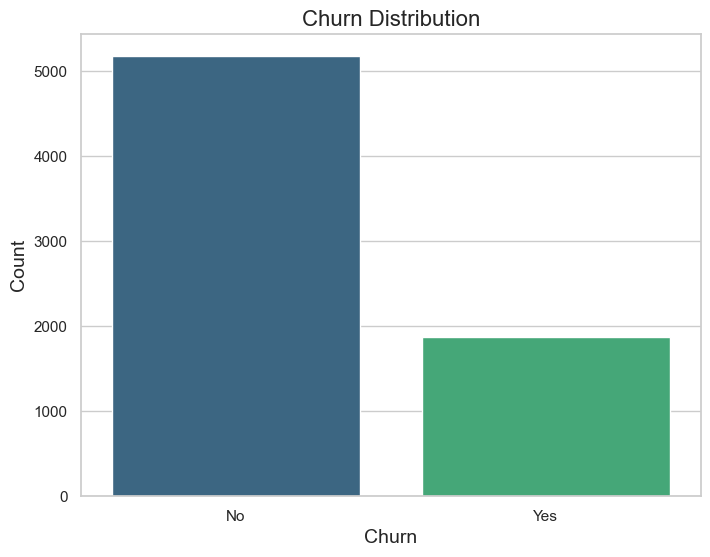

In [5]:
# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Distribution', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


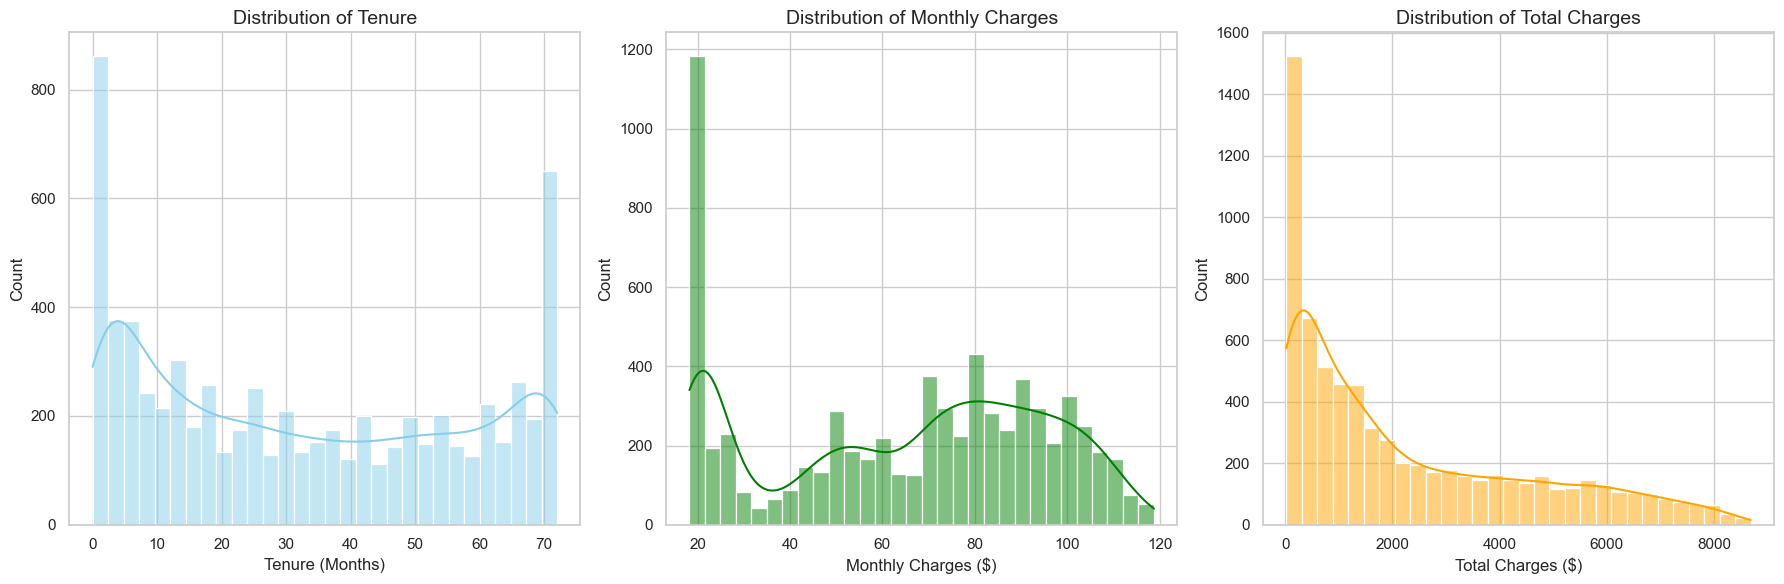

In [6]:
# Plotting the distribution of key numerical features: 'tenure', 'MonthlyCharges', and 'TotalCharges'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 'tenure' distribution
sns.histplot(df['tenure'], kde=True, color='skyblue', ax=axes[0], bins=30)
axes[0].set_title('Distribution of Tenure', fontsize=14)
axes[0].set_xlabel('Tenure (Months)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# 'MonthlyCharges' distribution
sns.histplot(df['MonthlyCharges'], kde=True, color='green', ax=axes[1], bins=30)
axes[1].set_title('Distribution of Monthly Charges', fontsize=14)
axes[1].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# 'TotalCharges' distribution (note: convert TotalCharges to numeric if not already)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # handle errors if any
sns.histplot(df['TotalCharges'], kde=True, color='orange', ax=axes[2], bins=30)
axes[2].set_title('Distribution of Total Charges', fontsize=14)
axes[2].set_xlabel('Total Charges ($)', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_17984\1997899278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0], palette='coolwarm')
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_17984\1997899278.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], palette='coolwarm')
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_17984\1997899278.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2], palette='coolw

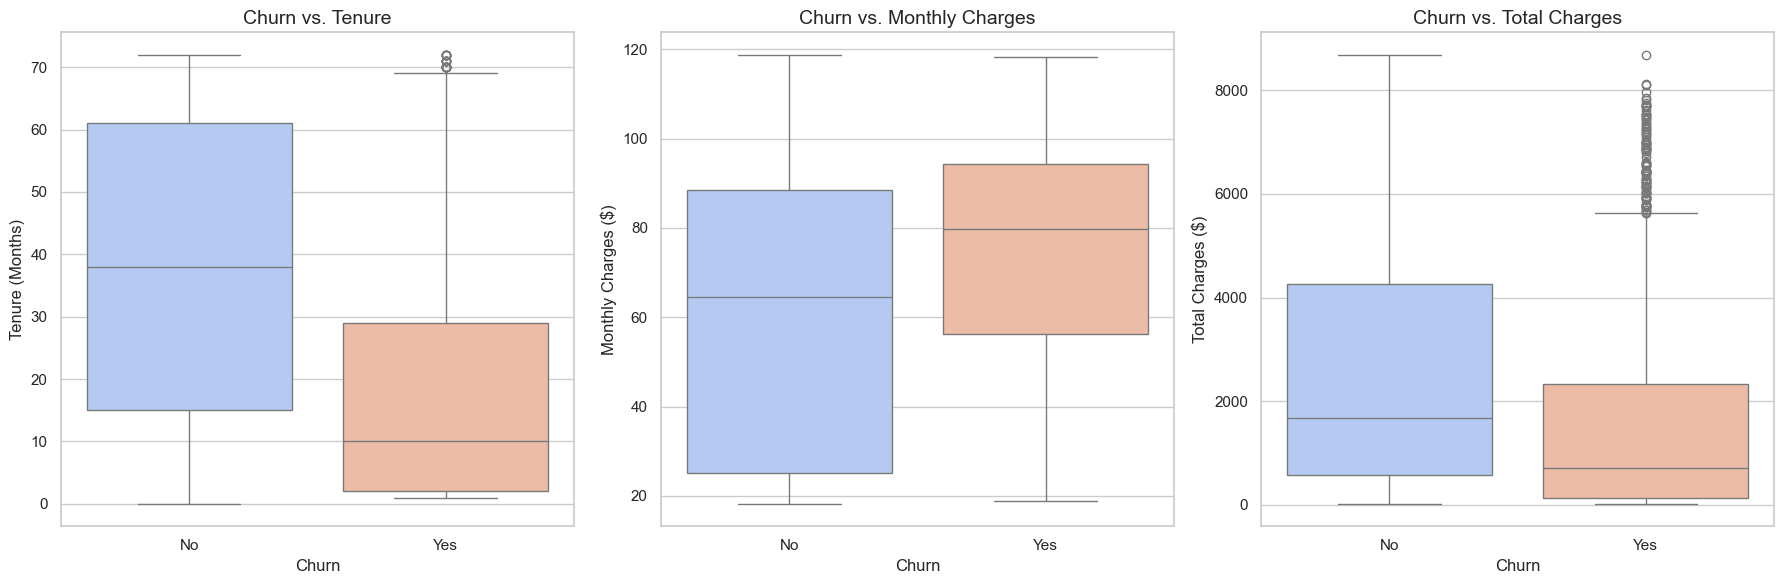

In [7]:
# Plotting Churn vs. Key Numerical Features: Tenure, Monthly Charges, Total Charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Churn vs. Tenure
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Churn vs. Tenure', fontsize=14)
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Tenure (Months)', fontsize=12)

# Churn vs. MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('Churn vs. Monthly Charges', fontsize=14)
axes[1].set_xlabel('Churn', fontsize=12)
axes[1].set_ylabel('Monthly Charges ($)', fontsize=12)

# Churn vs. TotalCharges
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title('Churn vs. Total Charges', fontsize=14)
axes[2].set_xlabel('Churn', fontsize=12)
axes[2].set_ylabel('Total Charges ($)', fontsize=12)

plt.tight_layout()
plt.show()


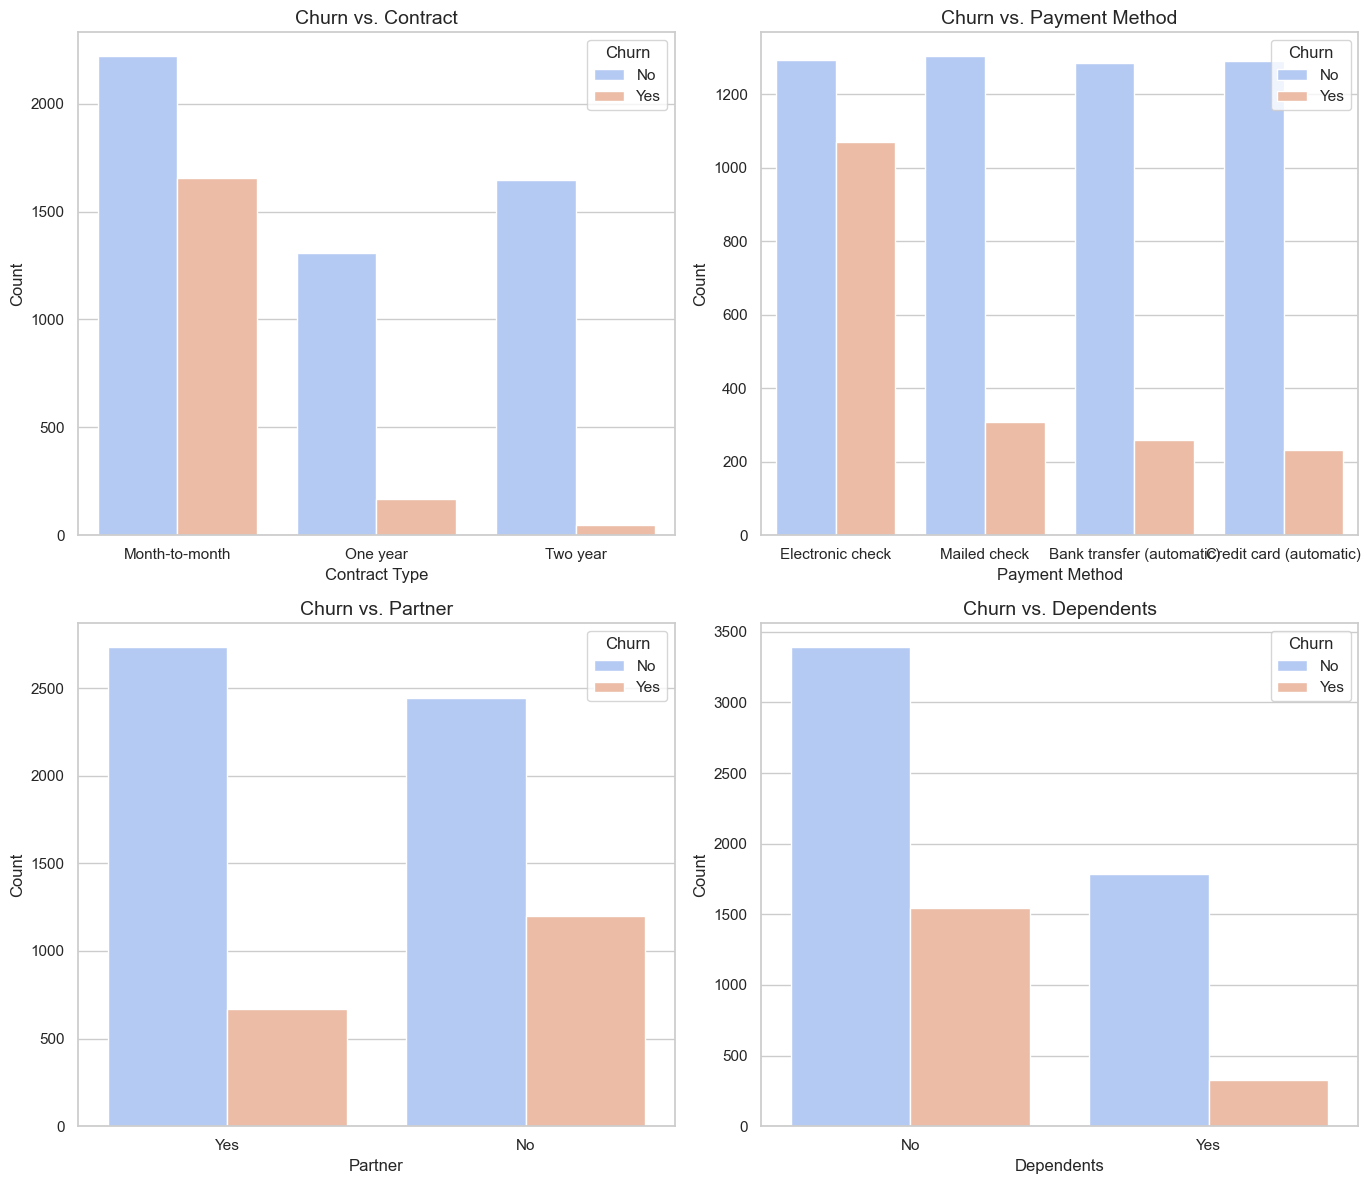

In [9]:
# Plotting Churn vs Categorical Features: Contract, PaymentMethod, Partner, Dependents
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Churn vs Contract
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Churn vs. Contract', fontsize=14)
axes[0, 0].set_xlabel('Contract Type', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# Churn vs PaymentMethod
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Churn vs. Payment Method', fontsize=14)
axes[0, 1].set_xlabel('Payment Method', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

# Churn vs Partner
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Churn vs. Partner', fontsize=14)
axes[1, 0].set_xlabel('Partner', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

# Churn vs Dependents
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Churn vs. Dependents', fontsize=14)
axes[1, 1].set_xlabel('Dependents', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_17984\2789888103.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


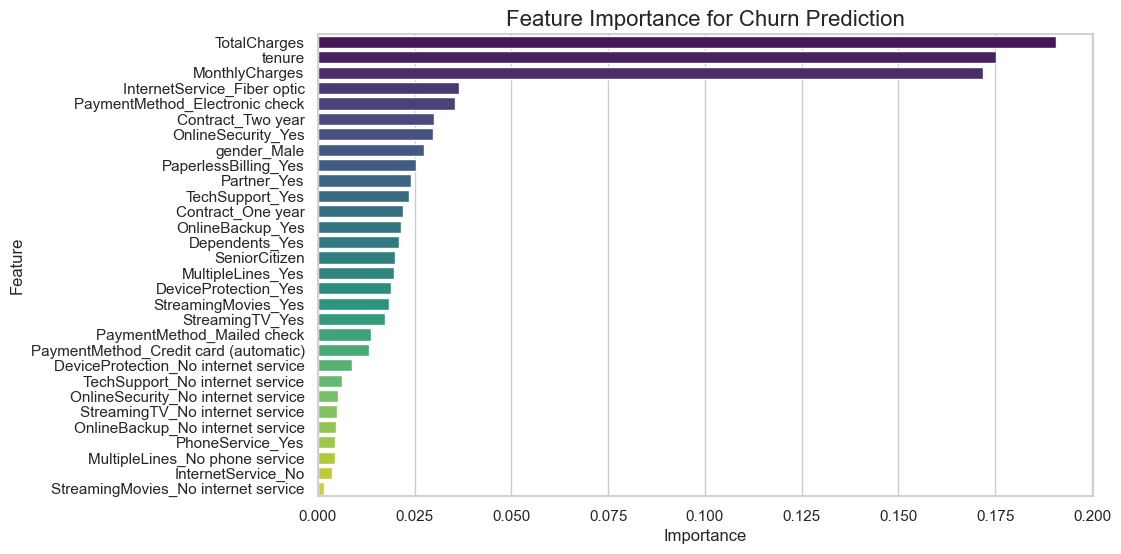

In [10]:
# Convert Churn to binary (0 = No, 1 = Yes) for model training
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Define the features and target variable
X = df.drop(columns=['customerID', 'Churn'])  # Exclude customerID and Churn column
y = df['Churn']

# Encode categorical features (Label Encoding for simplicity)
X_encoded = pd.get_dummies(X, drop_first=True)

# Import necessary libraries for model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier to assess feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances and sort them
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Churn Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


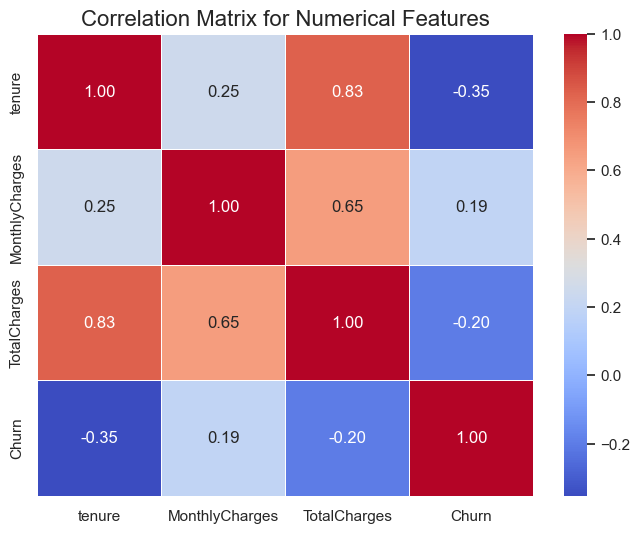

In [11]:
# Compute the correlation matrix for numerical features
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features', fontsize=16)
plt.show()
